In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

from networkx.readwrite import json_graph
import json

import pandas

import copy
import random
import seaborn as sns

In [ ]:
# MHO
adjmat_MHO  = pd.read_csv("../data/mho_edges.csv")
adjmat_MHO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MHNO
adjmat_MHNO  = pd.read_csv("../data/mhno_edges.csv")
adjmat_MHNO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MUO
adjmat_MUO  = pd.read_csv("../data/muo_edges.csv")
adjmat_MUO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MUNO
adjmat_MUNO  = pd.read_csv("../data/muno_edges.csv")
adjmat_MUNO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

In [4]:
def create_net(adjmat):
  # Create an empty graph
  tmpG= nx.Graph()

  # Iterate over the rows and columns of the DataFrame to add edges with weights
  for row in range(len(adjmat)):
    # print(adjmat.iloc[row, 0])
    source = adjmat.iloc[row, 0]
    target = adjmat.iloc[row, 1]
    weight = adjmat.iloc[row, 2]

    # Skip diagonal and negative edges
    if source != target and weight > 0:
        tmpG.add_edge(source, target, weight=weight)
  return(tmpG)

In [5]:
MHO = create_net(adjmat_MHO)
MHNO = create_net(adjmat_MHNO)
MUO = create_net(adjmat_MUO)
MUNO = create_net(adjmat_MUNO)

In [6]:
def get_connected_graph(net):
  # Get a list of connected components
  components = list(nx.connected_components(net))
  # Find the largest connected component
  largest_component = max(components, key=len)
  # Create a new graph containing only the largest component
  net_largest = net.subgraph(largest_component)
  print('Connected graph:', nx.is_connected(net_largest))
  return(net_largest)


MHO = get_connected_graph(MHO)
MHNO = get_connected_graph(MHNO)
MUO = get_connected_graph(MUO)
MUNO = get_connected_graph(MUNO)

Connected graph: True
Connected graph: True
Connected graph: True
Connected graph: True


In [7]:
def remove_random_node(g, n):
  lcc_sizes = []
  for i in range(n):
    node = random.choice(list(g.nodes()))
    g.remove_node(node)
    try:
      lcc_size = len(max(nx.connected_components(g), key=len))
    except:
      lcc_size = 0
    lcc_sizes.append(lcc_size)
  return(lcc_sizes)

In [8]:
mho_col = "#2a9d8f"
mhno_col = "#264653"
muo_col = "#edafb8"
muno_col = "#703d67"

In [ ]:
nreps = 1000
random.seed(505)

In [ ]:
MHO_lcc_sizes_random = [] 

while len(MHO_lcc_sizes_random) < nreps:
  MHO_kk = nx.Graph(MHO) 
  MHO_lcc_sizes_random.append(remove_random_node(MHO_kk, MHO_kk.order()))

In [ ]:
MHNO_lcc_sizes_random = []

while len(MHNO_lcc_sizes_random) < nreps:
  MHNO_kk = nx.Graph(MHNO) 
  MHNO_lcc_sizes_random.append(remove_random_node(MHNO_kk, MHNO_kk.order()))

In [ ]:
MUO_lcc_sizes_random = []

while len(MUO_lcc_sizes_random) < nreps:
  MUO_kk = nx.Graph(MUO) 
  MUO_lcc_sizes_random.append(remove_random_node(MUO_kk, MUO_kk.order()))

In [ ]:
MUNO_lcc_sizes_random = [] 

while len(MUNO_lcc_sizes_random) < nreps:
  MUNO_kk = nx.Graph(MUNO) 
  MUNO_lcc_sizes_random.append(remove_random_node(MUNO_kk, MUNO_kk.order()))

In [14]:
arr_MHO = np.array(MHO_lcc_sizes_random)
arr_MHNO = np.array(MHNO_lcc_sizes_random)
arr_MUO = np.array(MUO_lcc_sizes_random)
arr_MUNO = np.array(MUNO_lcc_sizes_random)

In [15]:
plot_MHO = np.mean(arr_MHO, axis = 0)
plot_MHNO = np.mean(arr_MHNO, axis = 0)
plot_MUO = np.mean(arr_MUO, axis = 0)
plot_MUNO = np.mean(arr_MUNO, axis = 0)

In [16]:
sd_MHO = np.std(arr_MHO, axis = 0)
sd_MHNO = np.std(arr_MHNO, axis = 0)
sd_MUO = np.std(arr_MUO, axis = 0)
sd_MUNO = np.std(arr_MUNO, axis = 0)

In [17]:
x_vals_MHO = [100 * i/MHO.order() for i in range(MHO.order())]
x_vals_MHNO = [100 * i/MHNO.order() for i in range(MHNO.order())]
x_vals_MUO = [100 * i/MUO.order() for i in range(MUO.order())]
x_vals_MUNO = [100 * i/MUNO.order() for i in range(MUNO.order())]

In [18]:
MHO_rand_to_plot = np.array([100 * i/MHO.order() for i in plot_MHO])
MHNO_rand_to_plot = np.array([100 * i/MHNO.order() for i in plot_MHNO])
MUO_rand_to_plot = np.array([100 * i/MUO.order() for i in plot_MUO])
MUNO_rand_to_plot = np.array([100 * i/MUNO.order() for i in plot_MUNO])



MHO_rand_to_plot_sd = np.array([100 * i/MHO.order() for i in sd_MHO])
MHNO_rand_to_plot_sd = np.array([100 * i/MHNO.order() for i in sd_MHNO])
MUO_rand_to_plot_sd =  np.array([100 * i/MUO.order() for i in sd_MUO])
MUNO_rand_to_plot_sd =  np.array([100 * i/MUNO.order() for i in sd_MUNO])


# NR50

In [ ]:
nreps = 1000
random.seed(505)

In [ ]:
threshold = .5 

In [22]:
def remove_random_node(g, n):
  number_of_attacks = 0
  gOrder = g.order()
  lcc_size = g.order()
  for i in range(n):
    number_of_attacks += 1
    node = random.choice(list(g.nodes()))
    g.remove_node(node)
    try:
      lcc_size = len(max(nx.connected_components(g), key=len))
    except:
      lcc_size = 0
    if lcc_size/gOrder <= threshold:
      break

  return(number_of_attacks/gOrder)

In [23]:
MHO_thresholds = []

while len(MHO_thresholds) < nreps:
  MHO_kk = nx.Graph(MHO)
  a50 = remove_random_node(MHO_kk, MHO_kk.order())
  MHO_thresholds.append(a50)

In [24]:
MHNO_thresholds = []

while len(MHNO_thresholds) < nreps:
  MHNO_kk = nx.Graph(MHNO)
  a50 = remove_random_node(MHNO_kk, MHNO_kk.order())
  MHNO_thresholds.append(a50)

In [25]:
MUO_thresholds = []

while len(MUO_thresholds) < nreps:
  MUO_kk = nx.Graph(MUO)
  a50 = remove_random_node(MUO_kk, MUO_kk.order())
  MUO_thresholds.append(a50)

In [26]:
MUNO_thresholds = []

while len(MUNO_thresholds) < nreps:
  MUNO_kk = nx.Graph(MUNO)
  a50 = remove_random_node(MUNO_kk, MUNO_kk.order())
  MUNO_thresholds.append(a50)

In [ ]:
sns.set(style="whitegrid")
my_pal = {"MHO" : mho_col, "MHNO" : mhno_col,
          "MUO" : muo_col, "MUNO" : muno_col}

In [28]:
a50_dict = {'MHO': MHO_thresholds,
            'MHNO': MHNO_thresholds,
            'MUO': MUO_thresholds,
            'MUNO': MUNO_thresholds
            }

df = pd.DataFrame(data = a50_dict)

In [30]:
df.mean(axis = 0)

,0
MHO,0.446083
MHNO,0.466288
MUO,0.388850
MUNO,0.384743


In [31]:
df.std(axis = 0)

,0
MHO,0.017141
MHNO,0.010377
MUO,0.020078
MUNO,0.019254


# Plot

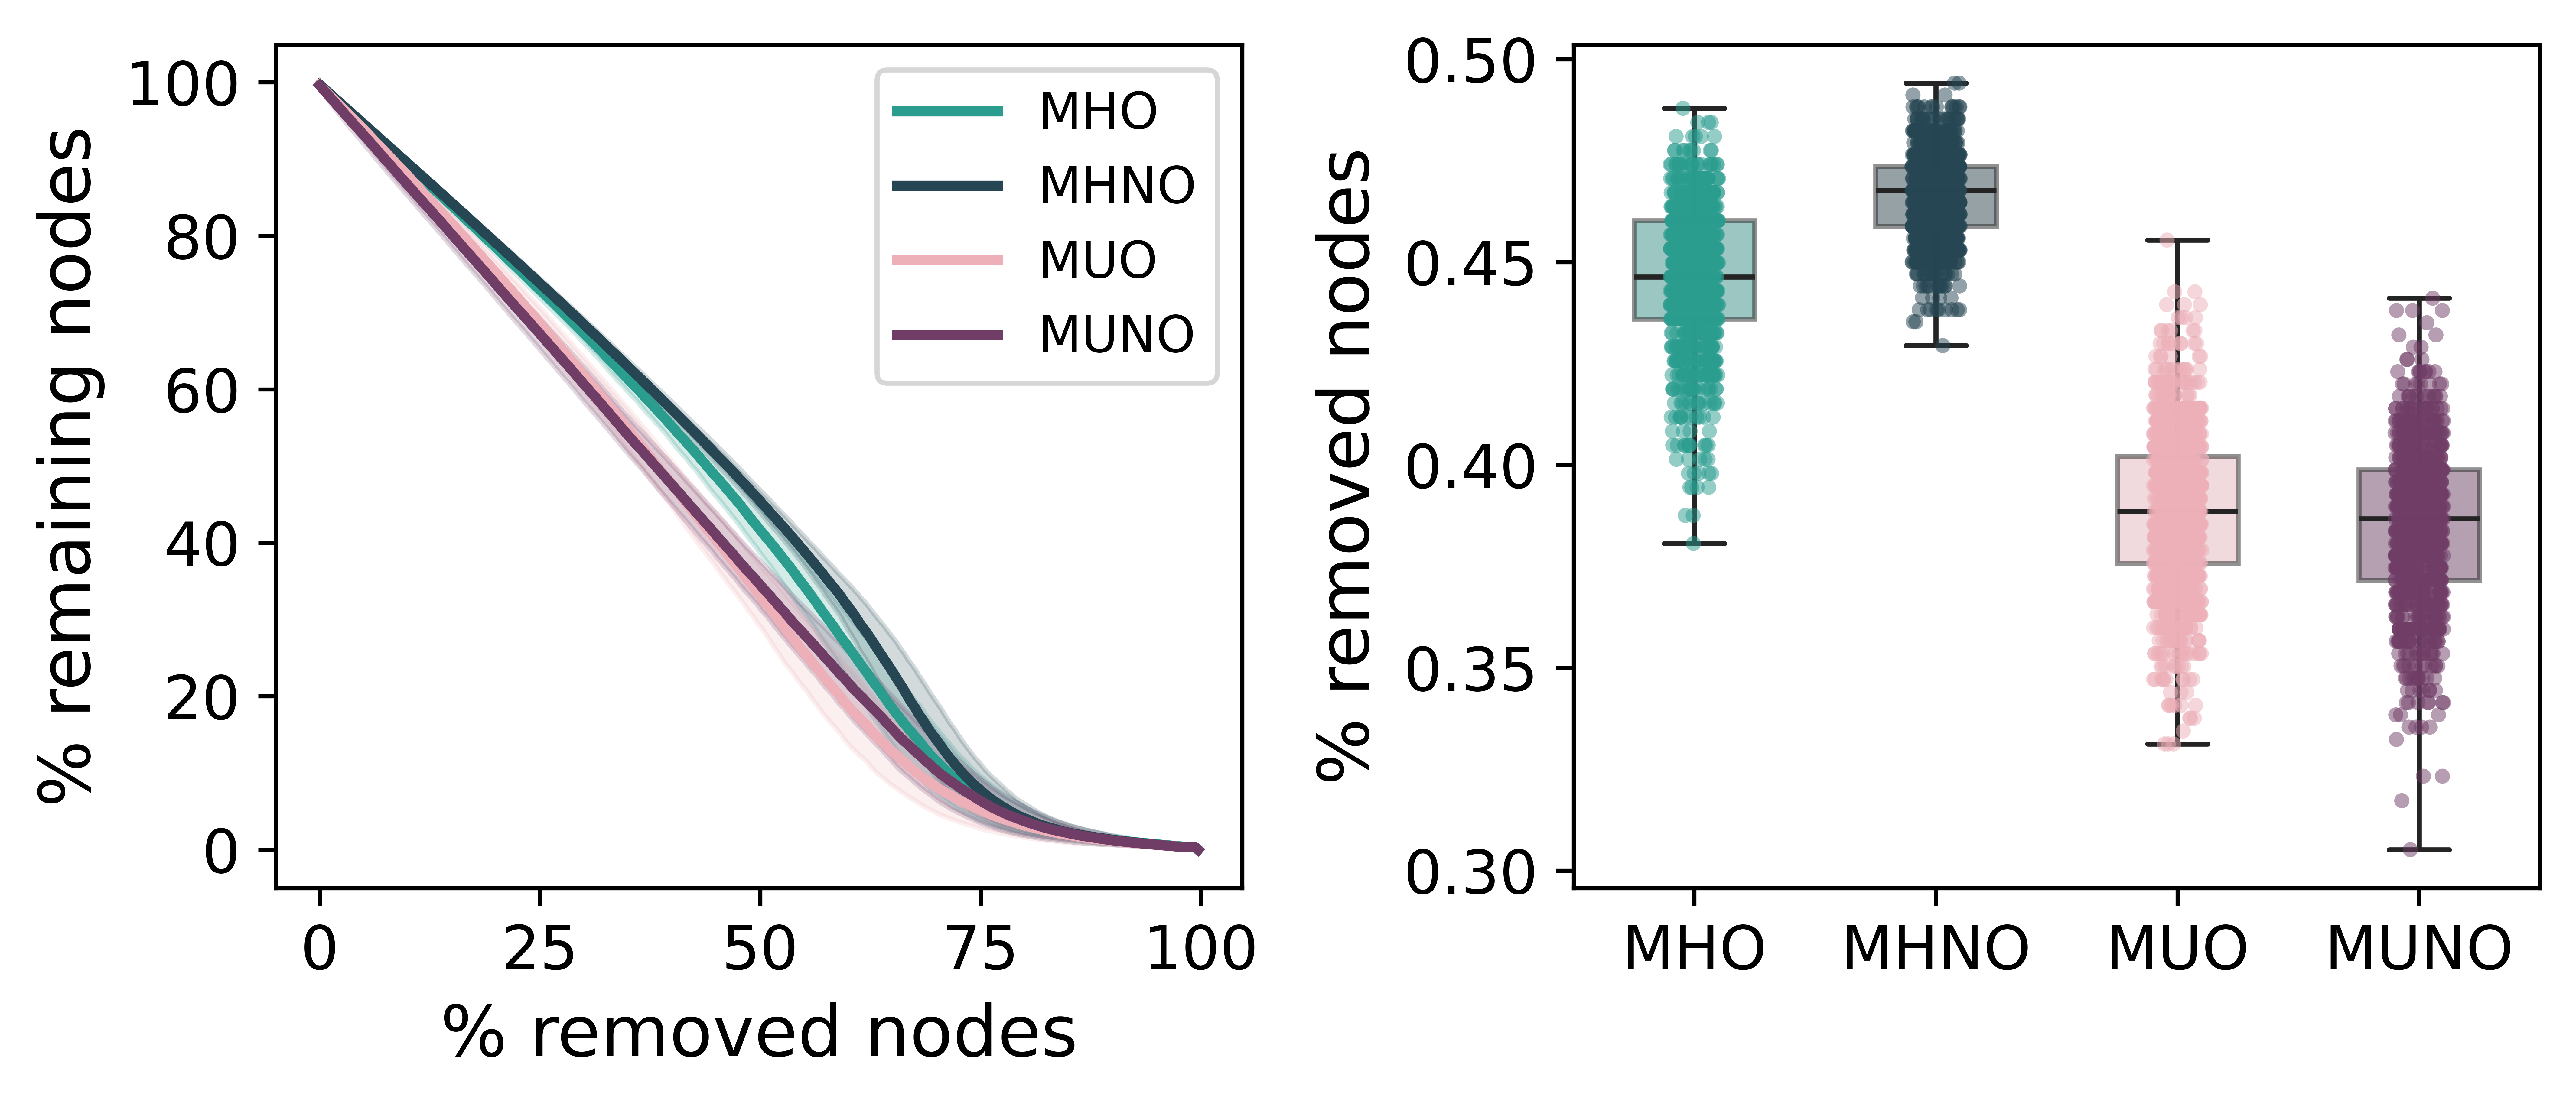

In [ ]:
plt.style.use("default")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3.15), dpi=1200)  

# Plot 1
ax1.plot(x_vals_MHNO, MHNO_rand_to_plot, linewidth=2, label="MHNO", color=mhno_col)
ax1.fill_between(x_vals_MHNO,
                 MHNO_rand_to_plot - MHNO_rand_to_plot_sd,
                 MHNO_rand_to_plot + MHNO_rand_to_plot_sd,
                 edgecolor="none", color=mhno_col, alpha=0.2)

ax1.plot(x_vals_MHO, MHO_rand_to_plot, linewidth=2, label="MHO", color=mho_col)
ax1.fill_between(x_vals_MHO,
                 MHO_rand_to_plot - MHO_rand_to_plot_sd,
                 MHO_rand_to_plot + MHO_rand_to_plot_sd,
                 edgecolor="none", color=mho_col, alpha=0.2)

ax1.plot(x_vals_MUNO, MUNO_rand_to_plot, linewidth=2, label="MUNO", color=muno_col)
ax1.fill_between(x_vals_MUNO,
                 MUNO_rand_to_plot - MUNO_rand_to_plot_sd,
                 MUNO_rand_to_plot + MUNO_rand_to_plot_sd,
                 edgecolor="none", color=muno_col, alpha=0.2)

ax1.plot(x_vals_MUO, MUO_rand_to_plot, linewidth=2, label="MUO", color=muo_col)
ax1.fill_between(x_vals_MUO,
                 MUO_rand_to_plot - MUO_rand_to_plot_sd,
                 MUO_rand_to_plot + MUO_rand_to_plot_sd,
                 edgecolor="none", color=muo_col, alpha=0.2)

ax1.set_xlabel("% removed nodes", fontsize=12)
ax1.set_ylabel("% remaining nodes", fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.legend(loc="best")

# Plot 2
sns.set_style("whitegrid")
sns.stripplot(
    data=df,
    palette=my_pal,
    alpha=0.5,
    size=3,
    jitter=0.1,
    ax=ax2
)
sns.boxplot(
    data=df,
    palette=my_pal,
    showfliers=False,
    width=0.5,
    boxprops={'alpha': 0.5},
    whis=[0, 100],
    ax=ax2 
)


ax2.set_xlabel("Co-occurrence networks", fontsize=12)
ax2.set_ylabel("% removed nodes", fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()

plt.savefig("../figures/randomAttacks.png",
            format='png', dpi=1200,
            bbox_inches='tight')
plt.show();
